In [12]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sn
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('abalone.csv')


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

There are 9 columns and 4177 rows

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

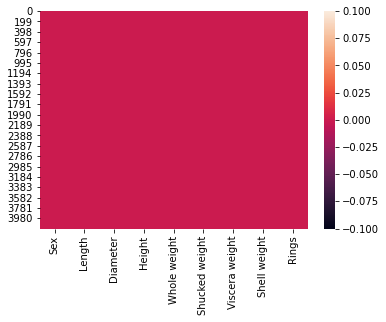

In [8]:
sn.heatmap(df.isnull())

There is no null value

In [5]:
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])


In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# Visualization

2    1528
1    1342
0    1307
Name: Sex, dtype: int64


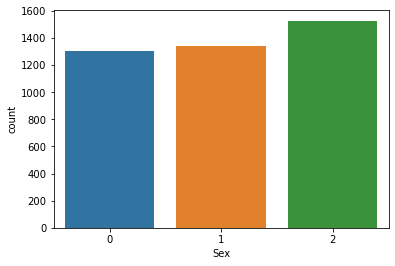

In [12]:
sn.countplot(x="Sex", data=df)
print(df['Sex'].value_counts())

There are 1307 male, 1342 female and 1528 infant trees

<AxesSubplot:xlabel='Length', ylabel='Density'>

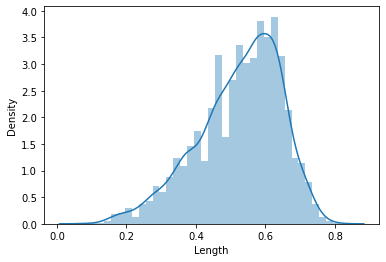

In [13]:
sn.distplot(df['Length'], kde=True)

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

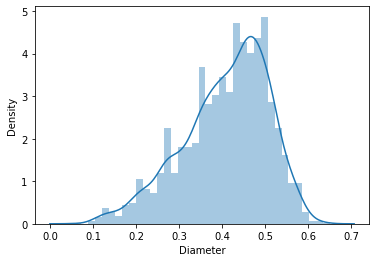

In [14]:
sn.distplot(df['Diameter'], kde=True)

<AxesSubplot:xlabel='Height', ylabel='Density'>

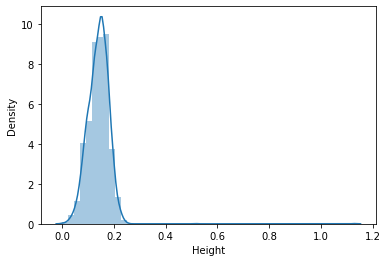

In [15]:
sn.distplot(df['Height'], kde=True)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

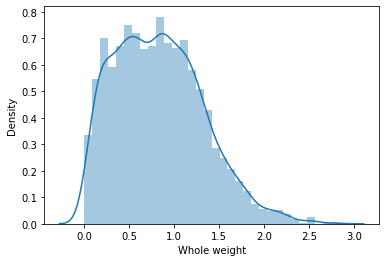

In [18]:
sn.distplot(df['Whole weight'], kde=True)

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

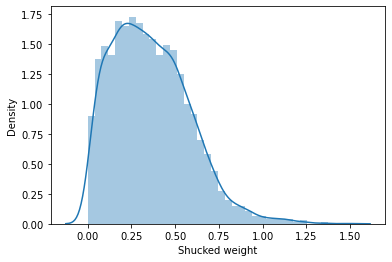

In [19]:
sn.distplot(df['Shucked weight'], kde=True)

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

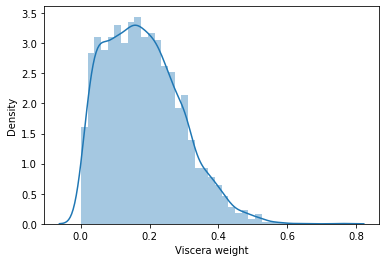

In [20]:
sn.distplot(df['Viscera weight'], kde=True)

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

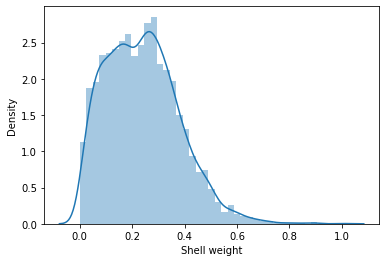

In [21]:
sn.distplot(df['Shell weight'], kde=True)

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64


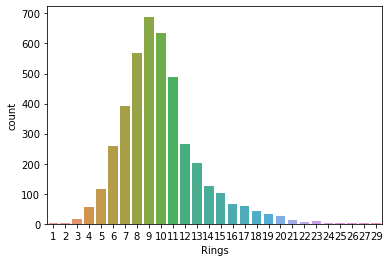

In [22]:
sn.countplot(x="Rings", data=df)
print(df['Rings'].value_counts())

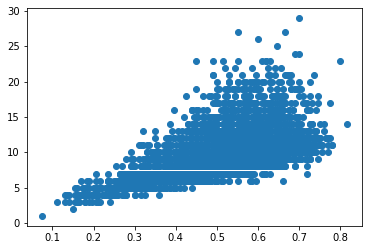

In [24]:
x=df['Length']
y=df['Rings']
plt.scatter(x,y)
plt.show()

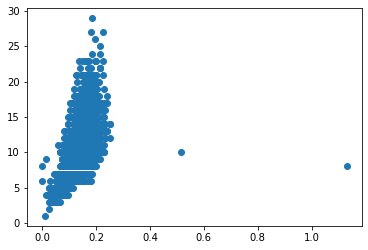

In [25]:
x=df['Height']
y=df['Rings']
plt.scatter(x,y)
plt.show()

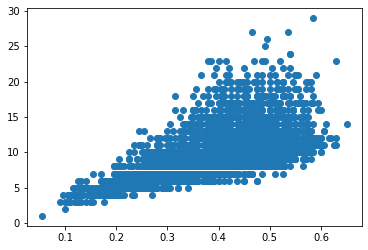

In [26]:
x=df['Diameter']
y=df['Rings']
plt.scatter(x,y)
plt.show()

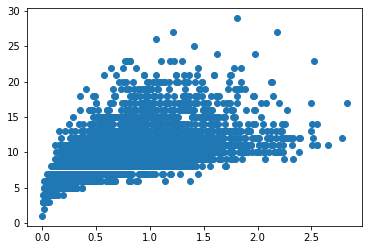

In [27]:
x=df['Whole weight']
y=df['Rings']
plt.scatter(x,y)
plt.show()

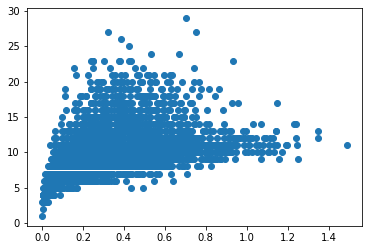

In [28]:
x=df['Shucked weight']
y=df['Rings']
plt.scatter(x,y)
plt.show()

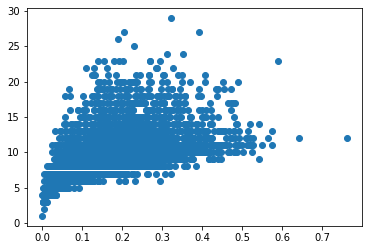

In [29]:
x=df['Viscera weight']
y=df['Rings']
plt.scatter(x,y)
plt.show()

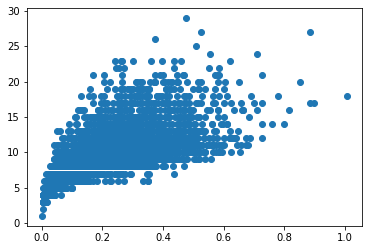

In [30]:
x=df['Shell weight']
y=df['Rings']
plt.scatter(x,y)
plt.show()

In every cases if the diameter,height and weight are incresing then the number of rings is also increasing

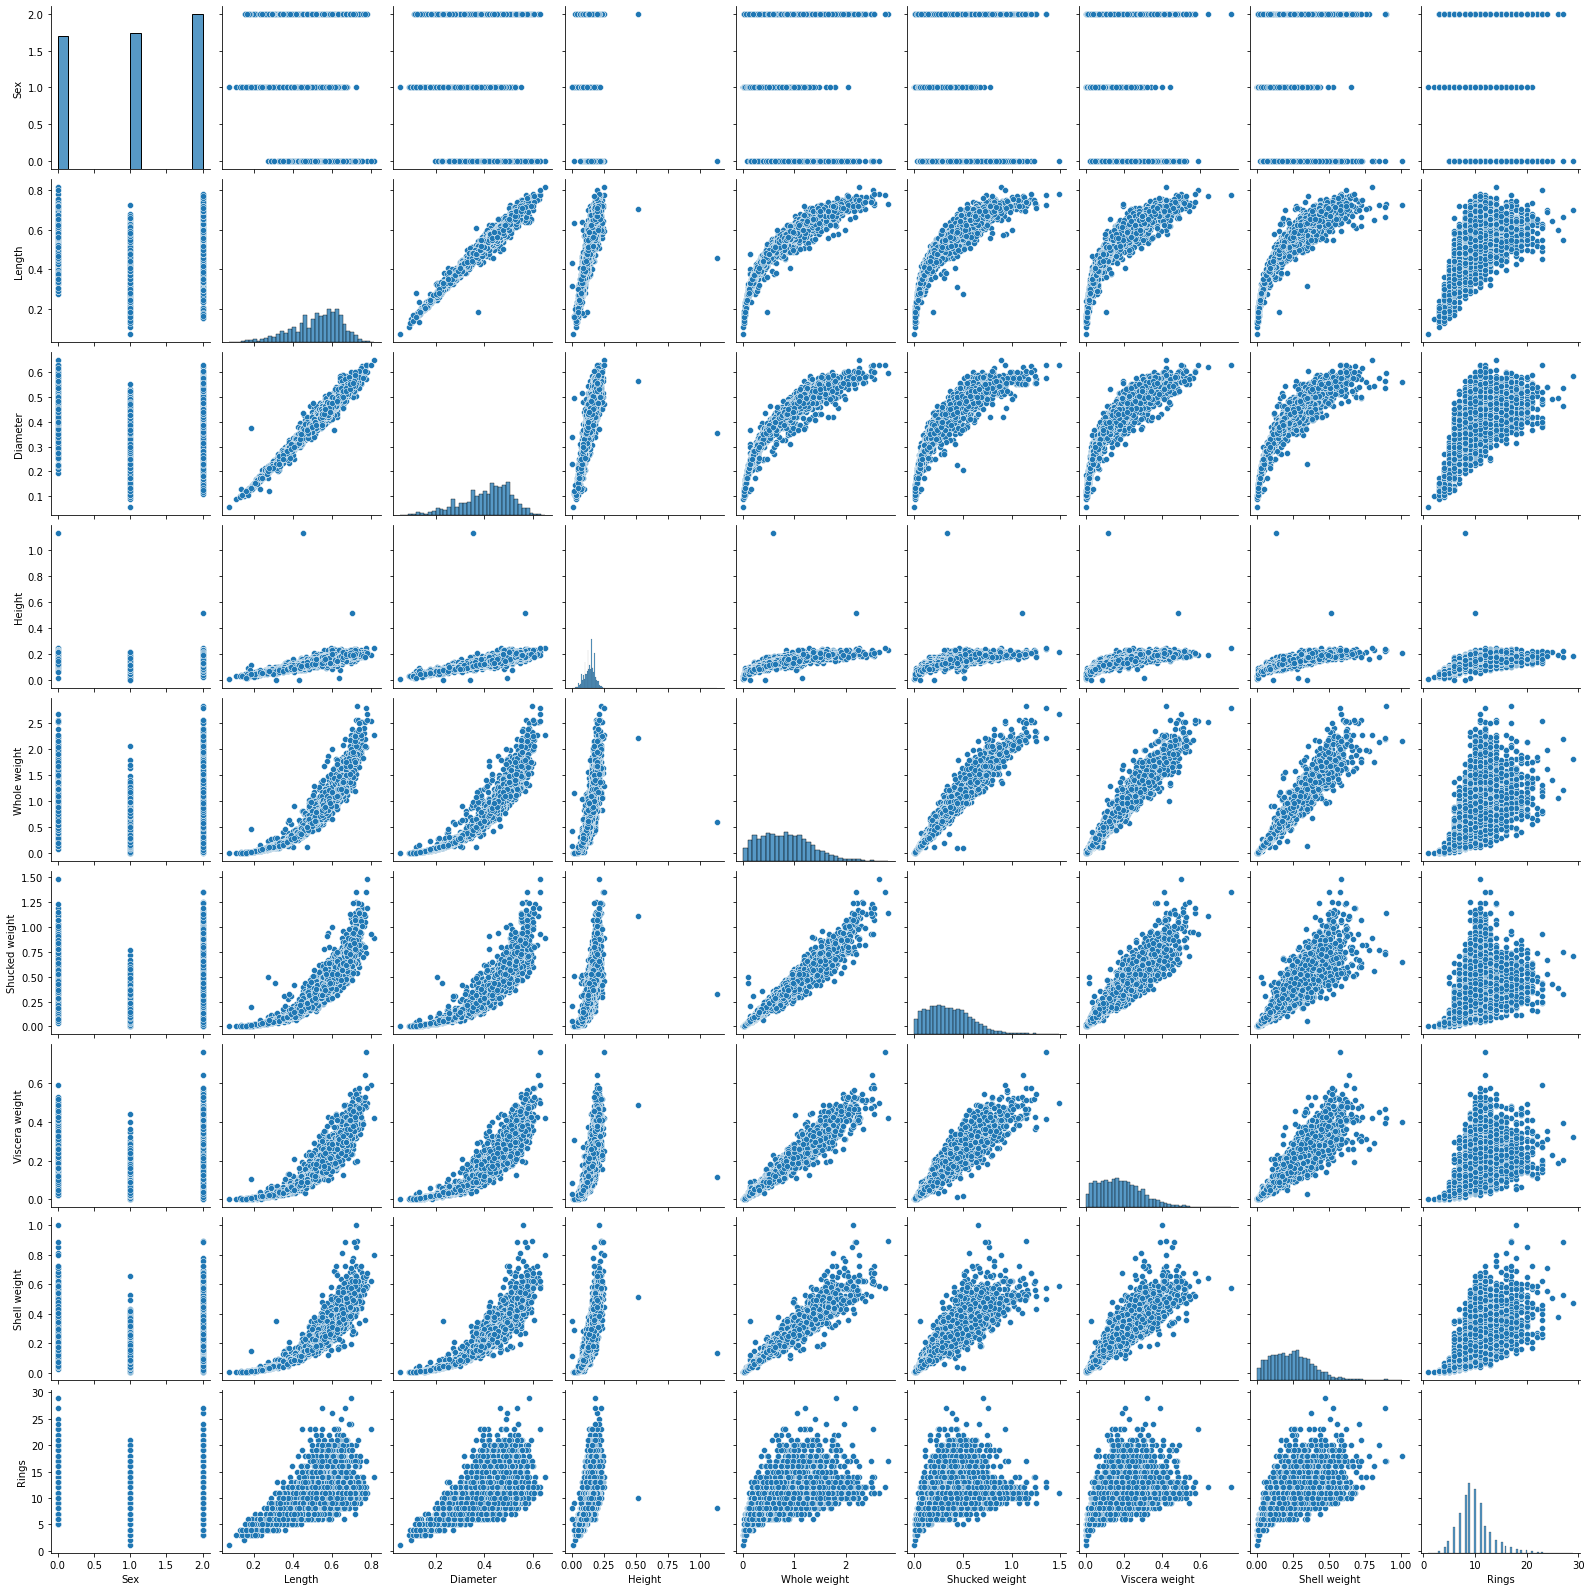

In [31]:
sn.pairplot(df)

# Checking Outlier

Sex                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Length            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Diameter          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Height               AxesSubplot(0.125,0.391471;0.227941x0.222059)
Whole weight      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Shucked weight    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Viscera weight          AxesSubplot(0.125,0.125;0.227941x0.222059)
Shell weight         AxesSubplot(0.398529,0.125;0.227941x0.222059)
Rings                AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

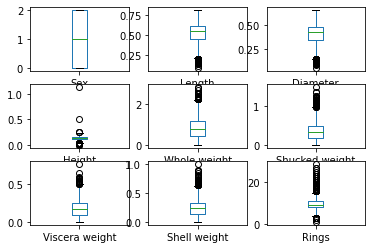

In [32]:
df.plot(kind='box',subplots=True,layout=(3,3))

In [6]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [7]:
df1=df[(z<3).all(axis=1)]
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [45]:
df1.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [46]:
df1.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,1.051403,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763
std,0.818071,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000


In [47]:
df1.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.043639,-0.046531,-0.046282,-0.034776,-0.016457,-0.045292,-0.043825,-0.033272
Length,-0.043639,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.567074
Diameter,-0.046531,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.584978
Height,-0.046282,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.612540
Whole weight,-0.034776,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.548295
Shucked weight,-0.016457,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.440424
Viscera weight,-0.045292,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.522917
Shell weight,-0.043825,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.622872
Rings,-0.033272,0.567074,0.584978,0.612540,0.548295,0.440424,0.522917,0.622872,1.000000


<AxesSubplot:>

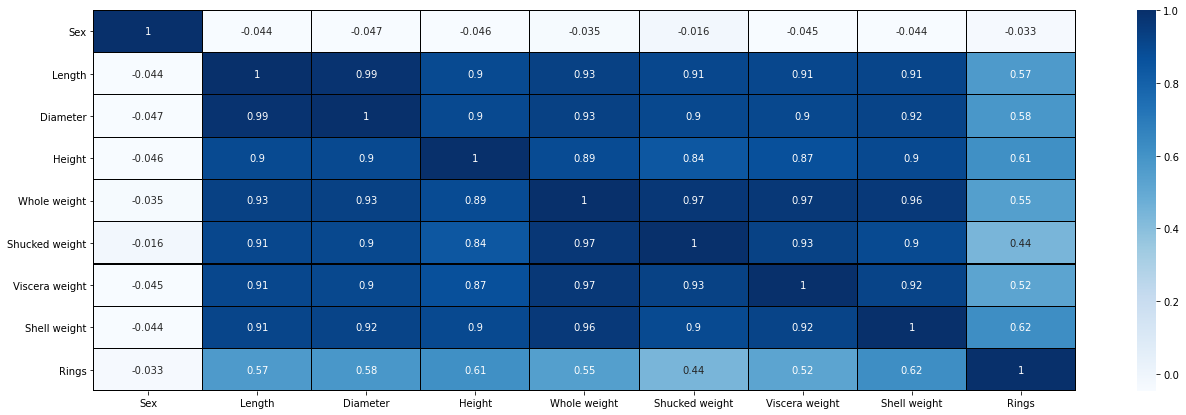

In [50]:
plt.figure(figsize=(22,7))
sn.heatmap(df1.corr(),cmap='Blues',linewidths=0.1,linecolor="black",annot=True)

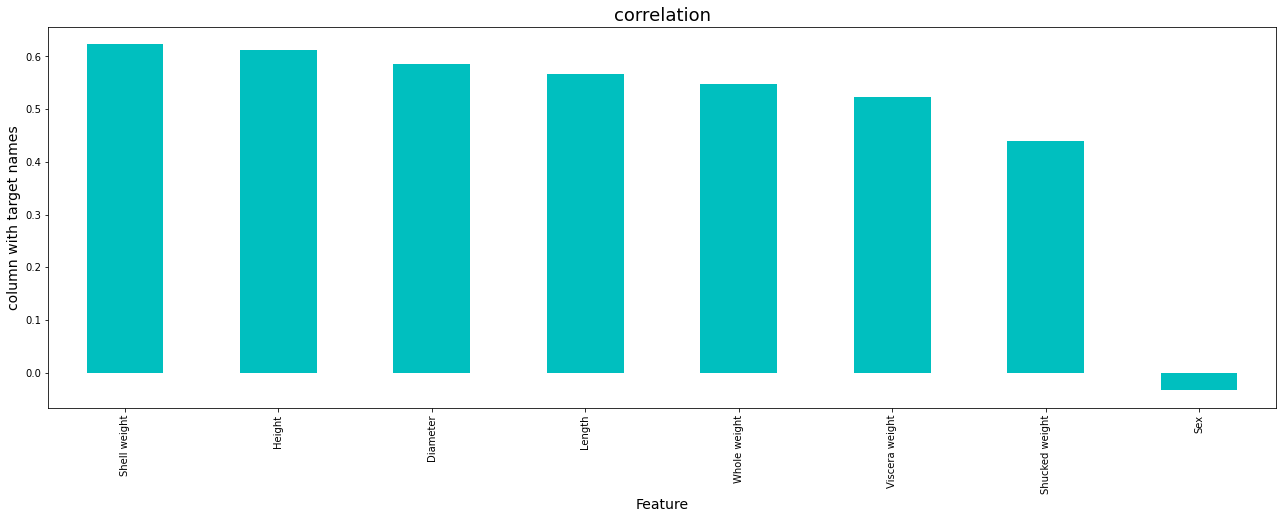

In [51]:
plt.figure(figsize=(22,7))
df1.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

There is psoitive correlation between Rings and every features

In [8]:
x=df1.iloc[:,0:-1]
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [9]:
x.shape

(4027, 8)

In [10]:
y=df1.iloc[:,-1]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [11]:
y.shape

(4027,)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [17]:
lg=LogisticRegression()

In [18]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.27569077926109903
At random state 0,the testing accuracy is:- 0.2456575682382134


At random state 1,the training accuracy is:- 0.2725861533685191
At random state 1,the testing accuracy is:- 0.26054590570719605


At random state 2,the training accuracy is:- 0.2825209562247749
At random state 2,the testing accuracy is:- 0.2555831265508685


At random state 3,the training accuracy is:- 0.2744489289040671
At random state 3,the testing accuracy is:- 0.2531017369727047


At random state 4,the training accuracy is:- 0.276001241850357
At random state 4,the testing accuracy is:- 0.2679900744416873


At random state 5,the training accuracy is:- 0.279105867742937
At random state 5,the testing accuracy is:- 0.2506203473945409


At random state 6,the training accuracy is:- 0.2725861533685191
At random state 6,the testing accuracy is:- 0.2617866004962779


At random state 7,the training accuracy is:- 0.26544551381558523
At random state 7,the testing ac

At random state 63,the training accuracy is:- 0.2707233778329711
At random state 63,the testing accuracy is:- 0.2555831265508685


At random state 64,the training accuracy is:- 0.2719652281900031
At random state 64,the testing accuracy is:- 0.26054590570719605


At random state 65,the training accuracy is:- 0.2741384663148091
At random state 65,the testing accuracy is:- 0.2655086848635236


At random state 66,the training accuracy is:- 0.27693262961813103
At random state 66,the testing accuracy is:- 0.2543424317617866


At random state 67,the training accuracy is:- 0.27538031667184104
At random state 67,the testing accuracy is:- 0.27915632754342434


At random state 68,the training accuracy is:- 0.26886060229742315
At random state 68,the testing accuracy is:- 0.2704714640198511


At random state 69,the training accuracy is:- 0.27010245265445515
At random state 69,the testing accuracy is:- 0.2630272952853598


At random state 70,the training accuracy is:- 0.27382800372555105
At random s

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=31)

In [20]:
x_train.shape

(2698, 8)

In [21]:
x_test.shape

(1329, 8)

In [22]:
y_train.shape

(2698,)

In [23]:
y_test.shape

(1329,)

In [24]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.2558314522197141
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        18
           5       0.29      0.06      0.09        36
           6       0.21      0.20      0.20        84
           7       0.29      0.42      0.34       124
           8       0.28      0.47      0.35       182
           9       0.32      0.39      0.35       244
          10       0.22      0.25      0.23       214
          11       0.17      0.27      0.21       139
          12       0.00      0.00      0.00        92
          13       0.00      0.00      0.00        77
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        25
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00     

In [25]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.1911211437170805
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.29      0.39      0.33        18
           5       0.27      0.19      0.23        36
           6       0.30      0.27      0.29        84
           7       0.23      0.27      0.25       124
           8       0.28      0.32      0.30       182
           9       0.24      0.20      0.22       244
          10       0.18      0.16      0.17       214
          11       0.11      0.14      0.12       139
          12       0.11      0.11      0.11        92
          13       0.18      0.13      0.15        77
          14       0.03      0.03      0.03        31
          15       0.09      0.16      0.11        19
          16       0.00      0.00      0.00        25
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00     

In [26]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.24529721595184348
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.42      0.44      0.43        18
           5       0.28      0.25      0.26        36
           6       0.27      0.27      0.27        84
           7       0.25      0.34      0.29       124
           8       0.27      0.31      0.29       182
           9       0.28      0.30      0.29       244
          10       0.23      0.25      0.24       214
          11       0.19      0.29      0.23       139
          12       0.24      0.09      0.13        92
          13       0.22      0.08      0.12        77
          14       0.13      0.06      0.09        31
          15       0.06      0.05      0.06        19
          16       0.40      0.08      0.13        25
          17       0.07      0.06      0.06        17
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00    

In [27]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.25733634311512416
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        36
           6       0.29      0.35      0.31        84
           7       0.35      0.39      0.37       124
           8       0.30      0.34      0.32       182
           9       0.24      0.45      0.31       244
          10       0.23      0.29      0.25       214
          11       0.21      0.22      0.21       139
          12       0.00      0.00      0.00        92
          13       0.00      0.00      0.00        77
          14       0.00      0.00      0.00        31
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        25
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00    

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.2607422591433811


In [33]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.252306459319082


In [34]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.20388576360525867


In [35]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.2590074441687345


# Hyper Parameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameter={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'linear']}

In [38]:
GV=GridSearchCV(svc,parameter,cv=5)

In [43]:
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']})

In [44]:
GV.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'poly'}

In [47]:
svc=SVC(kernel='poly', C=100, gamma=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.27313769751693
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.06      0.10        18
           5       0.33      0.44      0.38        36
           6       0.36      0.37      0.36        84
           7       0.34      0.42      0.37       124
           8       0.32      0.34      0.33       182
           9       0.28      0.43      0.34       244
          10       0.22      0.30      0.25       214
          11       0.23      0.18      0.20       139
          12       0.00      0.00      0.00        92
          13       0.16      0.04      0.06        77
          14       0.00      0.00      0.00        31
          15       0.12      0.16      0.14        19
          16       0.17      0.08      0.11        25
          17       0.00      0.00      0.00        17
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00       

# Saving Model

In [48]:
import pickle
filename = 'Abalone.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [49]:
loaded_model = pickle.load(open('Abalone.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.27313769751693
